In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('C:/Users/Makro_1997/train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.shape

(891, 12)

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Observtion:
    
    1.We have 177 null values in Age .
    
    2.We have 687 null values in Cabin column.

In [14]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
sur = df['Survived'].value_counts()
sur

0    549
1    342
Name: Survived, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

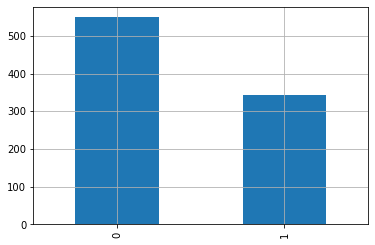

In [7]:
import matplotlib.pyplot as plt
df['Survived'].value_counts().plot(kind='bar',grid=True)
plt.show

Observations.

1.Most of the people didnot survived in this dataset.

In [8]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

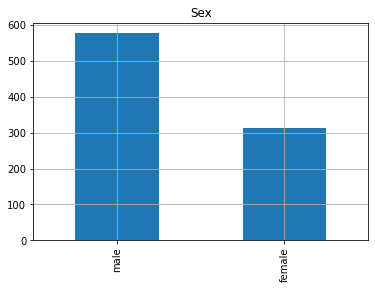

In [9]:
df['Sex'].value_counts().plot(kind='bar',title='Sex',grid=True)
plt.show()

Observation:
    
    1.most of the pasengers are male pasengers.

C:\Users\Makro_1997\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

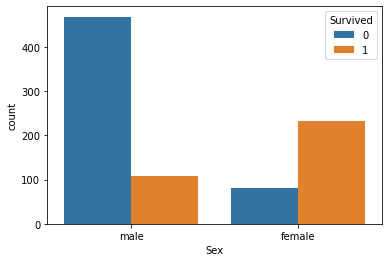

In [10]:
import seaborn as sns
sns.countplot(df['Sex'],hue=df['Survived'])

Observation:
    
    1.Most of the male did not survived.
    2.Most of the female are survived.

In [11]:
class_count = df['Pclass'].value_counts()
class_count

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Pclass'>

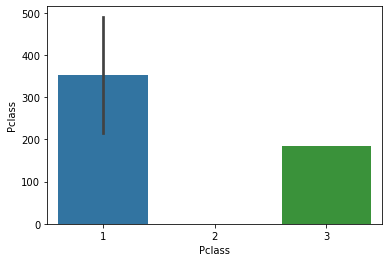

In [12]:
import seaborn as sns
sns.barplot(x=df['Pclass'],y=class_count)

Observation:
    
    1.Most of the pasengers download from third class
    2.less number of people traveled from second class.

C:\Users\Makro_1997\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

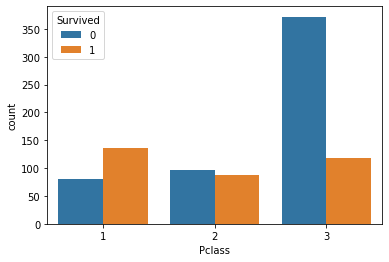

In [13]:
import seaborn as sns
sns.countplot(df['Pclass'],hue=df['Survived'])

Observation:
    
    1.Most of the third class people did not survived from third class

C:\Users\Makro_1997\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

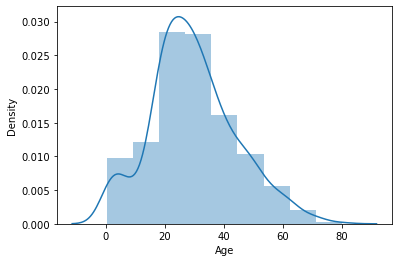

In [14]:
sns.distplot(df['Age'],bins=9)

Observation:
    
    1.Most of the pasengers from age 20 to 40
    
    2.Most of the passengers are youngsters.

In [15]:
cls = pd.crosstab(df['Pclass'],df['Survived'])
cls

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


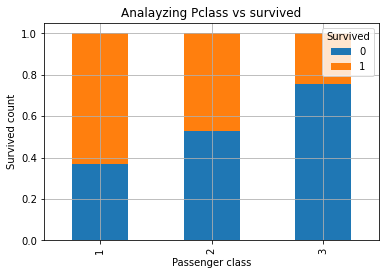

In [16]:
import matplotlib.pyplot as plt
clasz = pd.crosstab(df['Pclass'],df['Survived'])
clasz_normalize = clasz.div(clasz.sum(1).astype(float),axis=0)
clasz_normalize.plot(kind='bar',title='Analayzing Pclass vs survived',grid=True,stacked=True)
plt.xlabel('Passenger class')
plt.ylabel('Survived count')
plt.show()

Observation:
    
    1.Majority of the people survived from class 1.
    
    2.half of the people survived and another half of the people did not survived from class two.
    
    3.most of the people didnt survived frm class three.

In [17]:
clasz2 = pd.crosstab(df['Sex'],df['Survived'])
clasz2

Survived,0,1
Sex,,
female,81,233
male,468,109


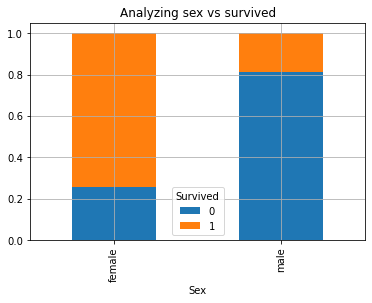

In [18]:
clasz2 = pd.crosstab(df['Sex'],df['Survived'])
clasz2_nrmalize = clasz2.div(clasz2.sum(1).astype(float),axis=0)
clasz2_nrmalize.plot(kind='bar',title='Analyzing sex vs survived',grid=True,stacked=True)
plt.show()

# Observation:
    
    1.Most of the male did not survived.
    
    2.Most of the female has survived.

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
passenger_class = sorted(df['Pclass'].unique())
passenger_class

[1, 2, 3]

In [21]:
for i in passenger_class:
    print('M :',len(df[(df['Sex']  == 'male') & (df['Pclass'] == i)]))
    print('F :',len(df[(df['Sex'] == 'female') & (df['Pclass'] == i)]))
male=df[df['Sex']=='male']
female = df[df['Sex']=='female']

M : 122
F : 94
M : 108
F : 76
M : 347
F : 144


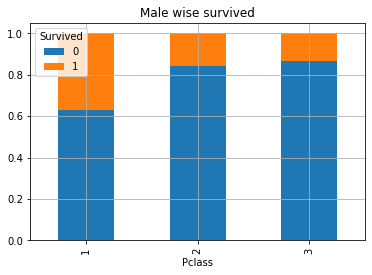

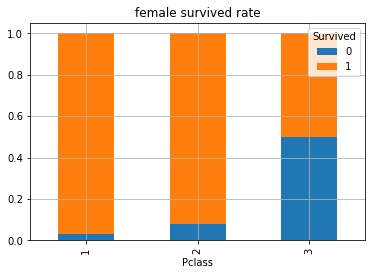

In [22]:
male_rep = pd.crosstab(male['Pclass'],male['Survived']) 
male_rep = male_rep.div(male_rep.sum(1).astype(float),axis=0)
male_rep.plot(kind='bar',title='Male wise survived',grid=True,stacked=True)
plt.show()
female_rep = pd.crosstab(female['Pclass'],female['Survived'])
female_rep = female_rep.div(female_rep.sum(1).astype(float),axis=0)
female_rep.plot(kind='bar',title='female survived rate',grid=True,stacked=True)
plt.show()

In [24]:
df['Embarked'].isnull().any()
df['Embarked'].isnull().sum()

2

In [25]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [26]:
Embarked_values = df['Embarked'].replace(['S','C','Q'],[1,2,3],inplace=True)
Emb = sorted(df['Embarked'].unique())
Emb

[1.0, 2.0, 3.0, nan]

In [27]:
cc =df['Embarked'].value_counts()
cc

1.0    644
2.0    168
3.0     77
Name: Embarked, dtype: int64

<AxesSubplot:title={'center':'Embarked values'}>

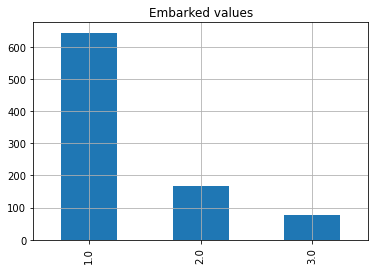

In [28]:
cc.plot(kind='bar',title='Embarked values',grid = True)

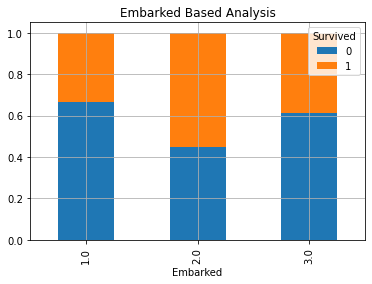

In [31]:
Embar = pd.crosstab(df['Embarked'],df['Survived'])
Embark = Embar.div(Embar.sum(1).astype(float),axis=(0))
Embark.plot(kind='bar',title='Embarked Based Analysis',grid=True,stacked=True)
plt.show()